In [1]:
import pandas as pd
from datetime import datetime
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4","ISO3"]
# Source: https://sites.google.com/view/snuaric/data/covid-19-data/covid-19-data?authuser=0
# ISO3 is a country variable

# https://www.worldometers.info/world-population/india-population/
german_population=84299671 # Tuesday, June 7, 2022

#MVAR1= Cum Confirmed cases
#MVAR2= Cum Deaths Cases
#MVAR3= Cum Recovered Cases
#MVAR4= Quarantined Cases

df = pd.read_csv("covid_de_world.csv", header=0, usecols=df_columns)

df2 = df[df["ISO3"] == "DEU"]
def parse(x):
	return datetime.strptime(x, '%d%b%y')

df2["DATE"] = df2["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
df_new = df.set_index('DATE')
df2=df2.sort_values(by=['DATE'], ascending=True)
# # sk = df["Country"] == "Republic of Korea"
df2 = df2[23:-2]

df2.tail(10)
# df2.head(10)

C:\Users\junaid\AppData\Local\Temp/ipykernel_21004/126436827.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["DATE"] = df2["DATE"].apply(parse)


,ISO3,MVAR1,DATE,MVAR2,MVAR3,MVAR4
50378,DEU,25287462.0,2022-05-06,136523.0,0.0,25150939.0
50379,DEU,25295950.0,2022-05-07,136533.0,0.0,25159417.0
50380,DEU,25299300.0,2022-05-08,136538.0,0.0,25162762.0
50381,DEU,25406868.0,2022-05-09,136756.0,0.0,25270112.0
50382,DEU,25503878.0,2022-05-10,136987.0,0.0,25366891.0
50383,DEU,25592839.0,2022-05-11,137184.0,0.0,25455655.0
50384,DEU,25661838.0,2022-05-12,137348.0,0.0,25524490.0
50385,DEU,25723697.0,2022-05-13,137492.0,0.0,25586205.0
50386,DEU,25729848.0,2022-05-14,137499.0,0.0,25592349.0
50387,DEU,25732153.0,2022-05-15,137499.0,0.0,25594654.0


In [2]:
print("Original Datalength: ",df2.shape[0])

Original Datalength:  844


In [3]:
# check if there are any missing dates for which data is not recorded. If so, then print them
df_new = df2.set_index('DATE')
pd.date_range(start = '2020-01-23', end = '2022-05-15' ).difference(df_new.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

data_length: 544


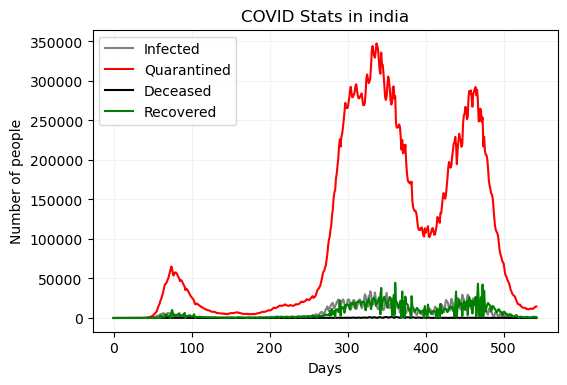

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(6, 4), dpi=100)
neg_escape=200+100
data_len=df2.shape[0]-neg_escape
print("data_length:", data_len)

#Cummulative numbers
infected_cum=df2[['MVAR1']][0:data_len].to_numpy()
quarantined_cum=df2[['MVAR4']][0:data_len].to_numpy()
deceased_cum=df2[['MVAR2']][0:data_len].to_numpy()
recovered_cum=df2[['MVAR3']][0:data_len].to_numpy()


#Daily numbers
infected=infected_cum[1:len(infected_cum)]-infected_cum[0:len(infected_cum)-1]
quarantined=quarantined_cum[0:len(infected_cum)-1]
deceased=deceased_cum[1:len(deceased_cum)]-deceased_cum[0:len(deceased_cum)-1]
recovered=recovered_cum[1:len(recovered_cum)]-recovered_cum[0:len(recovered_cum)-1]


oner=np.ones((len(infected),1))
residual=infected+quarantined+deceased+recovered
susceptible=german_population*oner-residual

plt.plot(infected,color='grey')
plt.plot(quarantined,color='red')
plt.plot(deceased,color='black')
plt.plot(recovered,color='green')



plt.grid(color='0.95')
plt.legend(['Infected','Quarantined','Deceased','Recovered'])
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('COVID Stats in india')
plt.show()


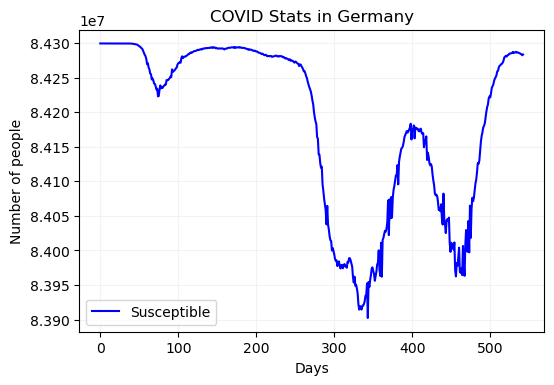

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(6, 4), dpi=100)
plt.plot(susceptible,color='blue')
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Susceptible'])
plt.title('COVID Stats in Germany')
plt.show()

In [6]:
new_df=df2.iloc[0:data_len,1:]
new_df=new_df.reindex(index=new_df.index[::-1])
new_df.rename(columns = {'MVAR1':'CONFIRM'}, inplace = True)
new_df.rename(columns = {'MVAR2':'DEATH'}, inplace = True)
new_df.rename(columns = {'MVAR3':'RELEASE'}, inplace = True)
new_df.rename(columns = {'MVAR4':'QUARANT'}, inplace = True)
new_df.to_excel("covid_data_refined_544days.xlsx")
new_df.head(10)


,CONFIRM,DATE,DEATH,RELEASE,QUARANT
50087,3745227.0,2021-07-19,91363.0,3639640.0,14224.0
50086,3744681.0,2021-07-18,91362.0,3638720.0,14599.0
50085,3743389.0,2021-07-17,91359.0,3637480.0,14550.0
50084,3741781.0,2021-07-16,91337.0,3636960.0,13484.0
50083,3740325.0,2021-07-15,91319.0,3636120.0,12886.0
50082,3738683.0,2021-07-14,91287.0,3635420.0,11976.0
50081,3737135.0,2021-07-13,91259.0,3634550.0,11326.0
50080,3736489.0,2021-07-12,91233.0,3633520.0,11736.0
50079,3736165.0,2021-07-11,91231.0,3632930.0,12004.0
50078,3735420.0,2021-07-10,91225.0,3632330.0,11865.0


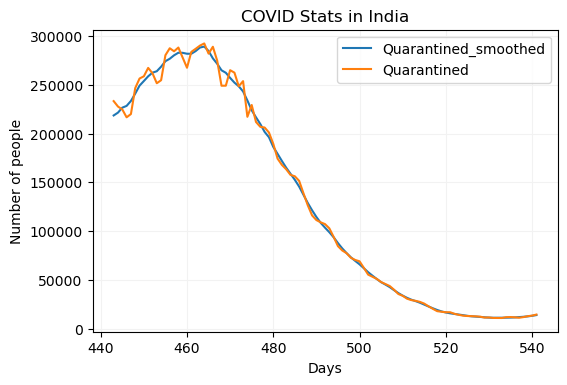

In [7]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(6, 4), dpi=100)
import numpy as np
import math
from scipy.signal import savgol_filter

days=np.arange(len(infected))

######defining factors##########
window_len=11
degree_poly=3
################

sig=np.squeeze(quarantined)
smooth_sig=savgol_filter(sig,window_len,degree_poly)


plt.plot(days[-100:-1],smooth_sig[-100:-1],days[-100:-1],sig[-100:-1])
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Quarantined_smoothed','Quarantined'])
plt.title('COVID Stats in India')
plt.show()

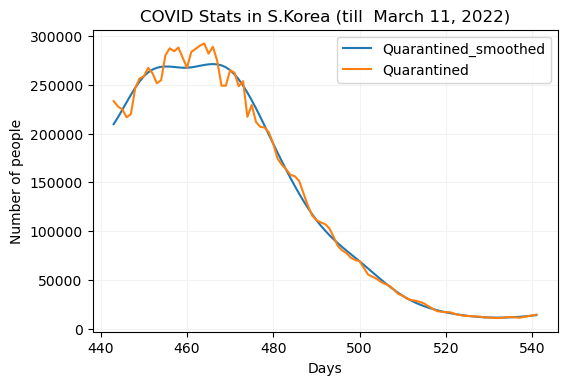

In [8]:
from scipy.interpolate import CubicSpline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(6, 4), dpi=100)

sampling_fact=10;  # defining factor

c_sig = CubicSpline(days[0:len(days):sampling_fact],sig[0:len(days):sampling_fact])
cubic_sig=c_sig(days)

plt.plot(days[-100:-1],cubic_sig[-100:-1],days[-100:-1],sig[-100:-1])
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Quarantined_smoothed','Quarantined'])
plt.title('COVID Stats in S.Korea (till  March 11, 2022)')
plt.show()

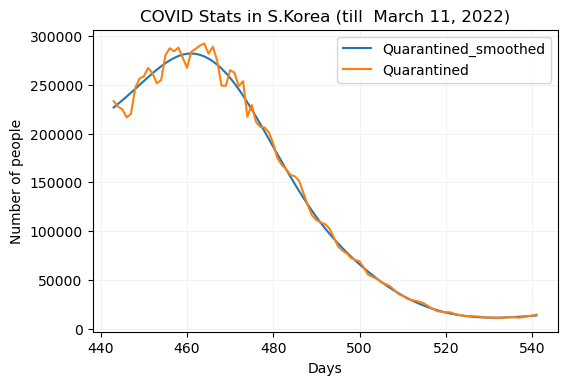

In [9]:
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)

figure(figsize=(6, 4), dpi=100)
plt.plot(days[-100:-1],cubic_sig_p[-100:-1],days[-100:-1],sig[-100:-1])
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Quarantined_smoothed','Quarantined'])
plt.title('COVID Stats in S.Korea (till  March 11, 2022)')
plt.show()

In [10]:
######defining factors##########
window_len=11
degree_poly=2
sampling_fact=3;
################

#SIQRD model states:

#Susceptible
sig=np.squeeze(susceptible)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p)) 
S=cubic_sig_p


#Infected
sig=np.squeeze(infected)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
I=cubic_sig_p

#Quarantined
sig=np.squeeze(quarantined)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
Q=cubic_sig_p

#Recovered
sig=np.squeeze(recovered)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
R=cubic_sig_p

#Deceased
sig=np.squeeze(deceased)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
D=cubic_sig_p

data=[days,S,I,Q,R,D]
data=np.array(np.transpose(data))

print(np.min(I))
print(np.min(Q))
print(np.min(R))
print(np.min(D))
print(np.min(S))

np.savetxt("SG_spline_SIQRD.csv", data,delimiter=",")


0.0
0.0
0.0
0.0
83915309.98522373
